# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice the visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Investors Exchange (IEX) using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [63]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2014 to Jan 1st 2018 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use iex as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'iex', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [64]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 1, 1)

In [65]:
# Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

In [66]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'iex', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [67]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [68]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.to_csv("Bank_Stock.csv")
bank_stocks.head()

BAC                                              C           \
               open     high      low    close     volume     open     high   
date                                                                          
2014-03-31  15.9374  16.0489  15.9095  15.9838   62115774  44.9375  45.2872   
2014-04-01  16.0582  16.1697  16.0396  16.1139   57423776  45.1172  45.6182   
2014-04-02  16.1232  16.1511  15.9188  16.0117   65285679  45.5237  45.7222   
2014-04-03  15.9931  16.0210  15.8258  15.9374   56534512  45.3252  45.3819   
2014-04-04  15.9931  16.0024  15.5192  15.5378  110409594  45.1266  45.1833   

                                          ...          MS                    \
                low    close    volume    ...        open     high      low   
date                                      ...                                 
2014-03-31  44.8808  45.0037  25651026    ...     28.2926  28.5467  28.1021   
2014-04-01  45.0510  45.1928  26813780    ...     28.4650  28.4922  28.1293   
2014-04-02  45.1266  45.6088  22347051    ...     28.3289  28.6646  28.1474   
2014-04-03  44.7862  45.0793  29237080    ...     28.5558  28.5648  27.8661   
2014-04-04  44.2946  44.5404  33010005    ...     28.2654  28.3652  27.5440   

                                   WFC                                       
              close    volume     open     high      low    close    volume  
date                                                                         
2014-03-31  28.2835   9421645  43.0430  43.1814  42.7921  43.0343  17901782  
2014-04-01  28.3198  11583595  43.1555  43.1987  42.8267  43.0603  16398766  
2014-04-02  28.5013  14699769  43.0603  43.1555  42.8354  43.0517  13035427  
2014-04-03  28.0839  10064709  43.0949  43.1641  42.8786  43.1122   9598908  
2014-04-04  27.5576  12750965  43.3026  43.6832  42.8786  42.8786  18702386  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [69]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [70]:
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-03-31   15.9374  16.0489  15.9095  15.9838   62115774  44.9375  45.2872   
2014-04-01   16.0582  16.1697  16.0396  16.1139   57423776  45.1172  45.6182   
2014-04-02   16.1232  16.1511  15.9188  16.0117   65285679  45.5237  45.7222   
2014-04-03   15.9931  16.0210  15.8258  15.9374   56534512  45.3252  45.3819   
2014-04-04   15.9931  16.0024  15.5192  15.5378  110409594  45.1266  45.1833   

Bank Ticker                                ...          MS                    \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2014-03-31   44.8808  45.0037  25651026    ...     28.2926  28.5467  28.1021   
2014-04-01   45.0510  45.1928  26813780    ...     28.4650  28.4922  28.1293   
2014-04-02   45.1266  45.6088  22347051    ...     28.3289  28.6646  28.1474   
2014-04-03   44.7862  45.0793  29237080    ...     28.5558  28.5648  27.8661   
2014-04-04   44.2946  44.5404  33010005    ...     28.2654  28.3652  27.5440   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-03-31   28.2835   9421645  43.0430  43.1814  42.7921  43.0343  17901782  
2014-04-01   28.3198  11583595  43.1555  43.1987  42.8267  43.0603  16398766  
2014-04-02   28.5013  14699769  43.0603  43.1555  42.8354  43.0517  13035427  
2014-04-03   28.0839  10064709  43.0949  43.1641  42.8786  43.1122   9598908  
2014-04-04   27.5576  12750965  43.3026  43.6832  42.8786  42.8786  18702386  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [71]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     29.1915
C       74.9024
GS     256.4280
JPM    104.5658
MS      52.3113
WFC     59.3233
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [72]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [73]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
date                                                                          
2014-03-31         NaN       NaN        NaN         NaN        NaN         NaN
2014-04-01    0.008139  0.004202   0.012634   -0.000660   0.001283    0.000604
2014-04-02   -0.006342  0.009205   0.008136    0.003151   0.006409   -0.000200
2014-04-03   -0.004640 -0.011610  -0.007054    0.002976  -0.014645    0.001405
2014-04-04   -0.025073 -0.011954  -0.017159   -0.014012  -0.018740   -0.005418

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you?**

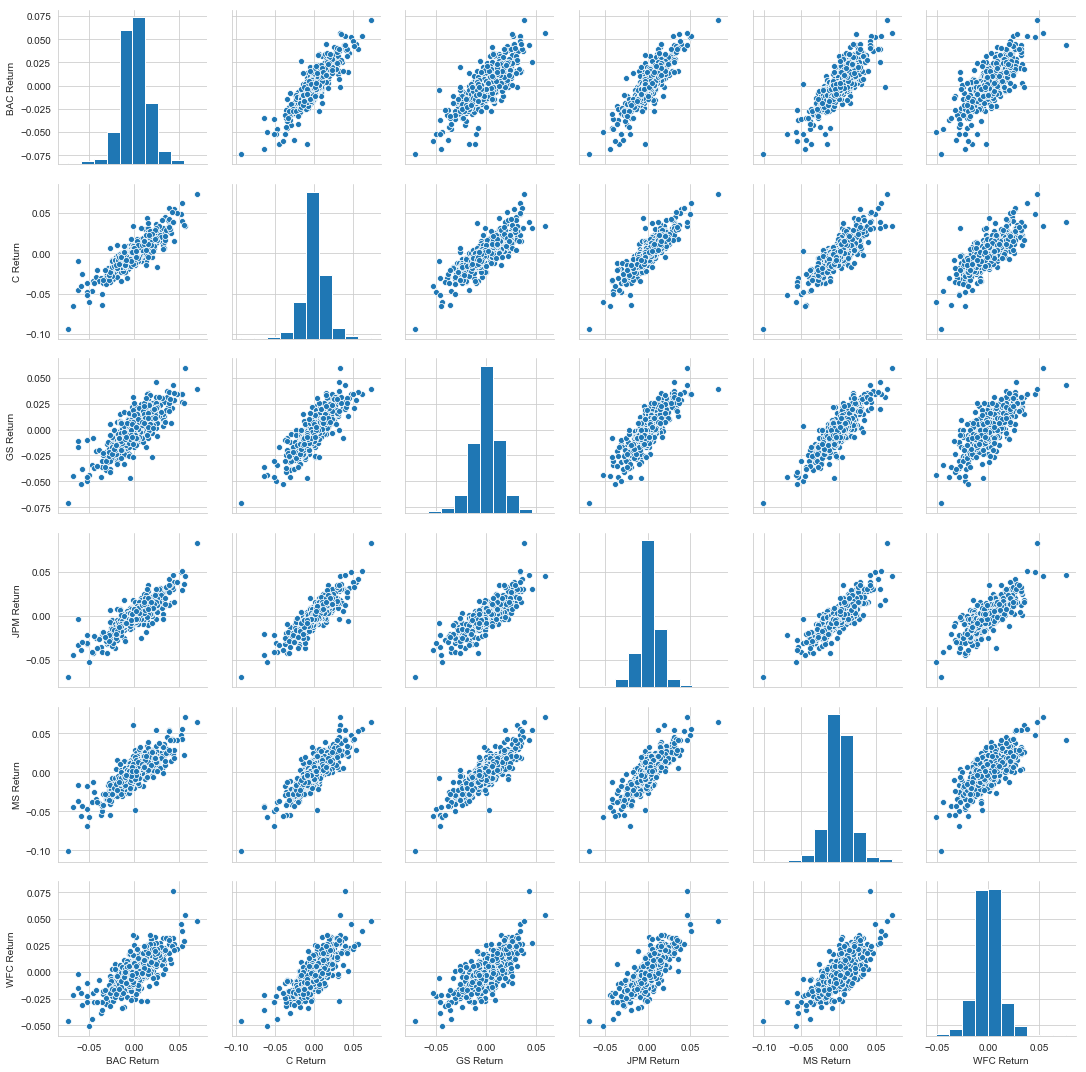

In [74]:
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [75]:
# Worst Drop (ngày có chỉ số tệ nhất)
returns.idxmin()

BAC Return    2016-06-24
C Return      2016-06-24
GS Return     2016-06-24
JPM Return    2016-06-24
MS Return     2016-06-24
WFC Return    2015-08-24
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [76]:
# Best Single Day Gain (ngày có chỉ số tốt nhất)
returns.idxmax()

BAC Return    2016-02-12
C Return      2016-02-12
GS Return     2016-11-09
JPM Return    2016-02-12
MS Return     2016-11-09
WFC Return    2016-11-10
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [77]:
returns.std()

BAC Return    0.016281
C Return      0.015106
GS Return     0.013914
JPM Return    0.012978
MS Return     0.016196
WFC Return    0.012307
dtype: float64

In [95]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Goldman Sach Stanley **

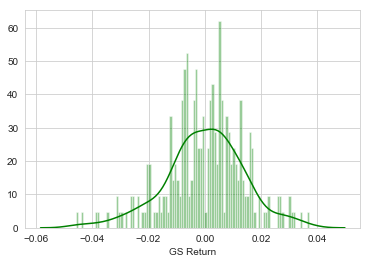

In [93]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['GS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

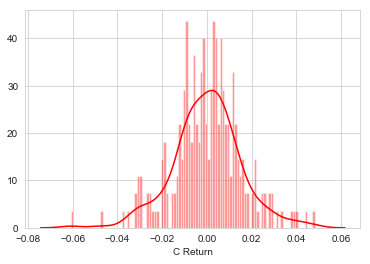

In [80]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

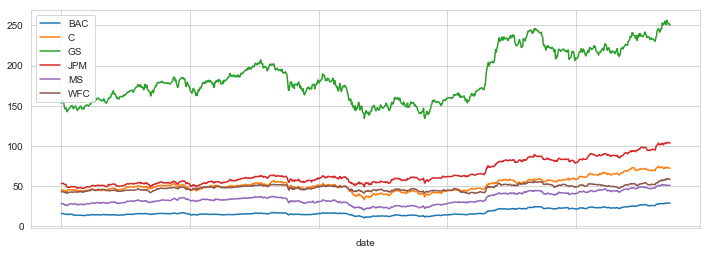

In [82]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()

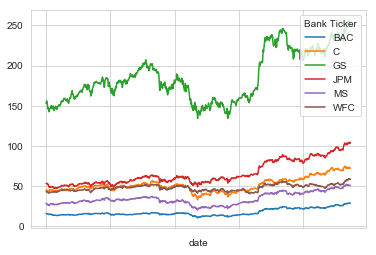

In [83]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

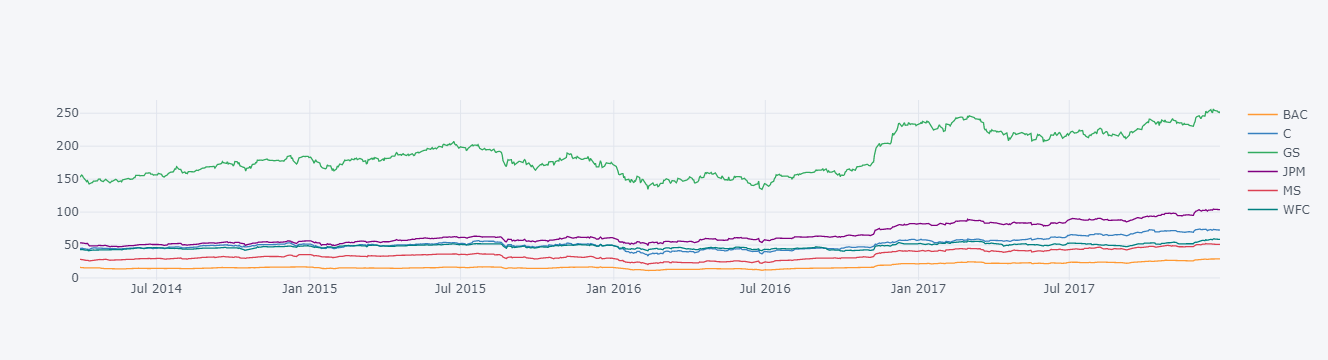

In [84]:
# plotly
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

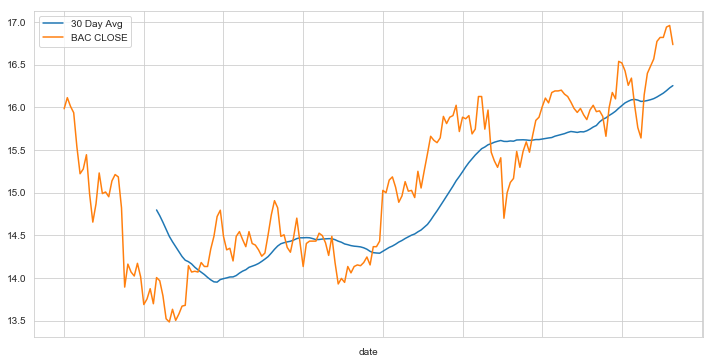

In [85]:
plt.figure(figsize=(12,6))
BAC['close'].loc["2014-01-01":"2015-01-01"].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['close'].loc["2014-01-01":"2015-01-01"].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

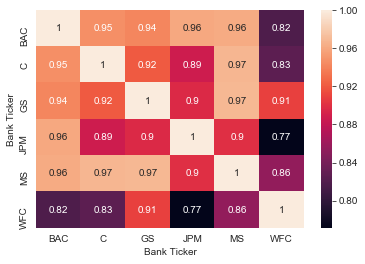

In [86]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

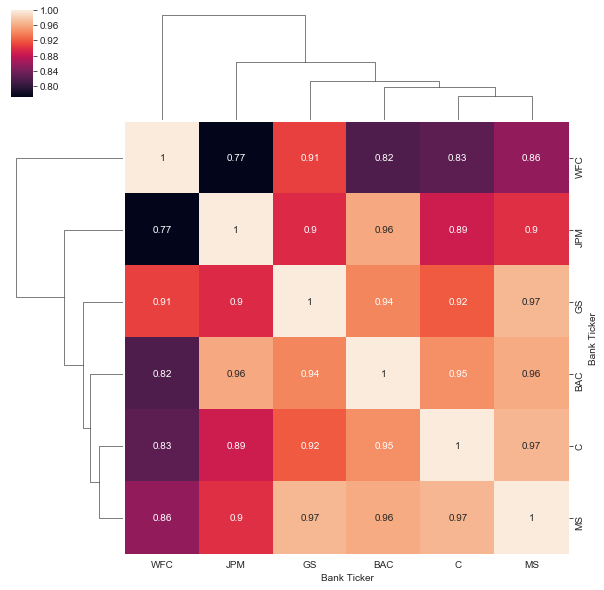

In [87]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

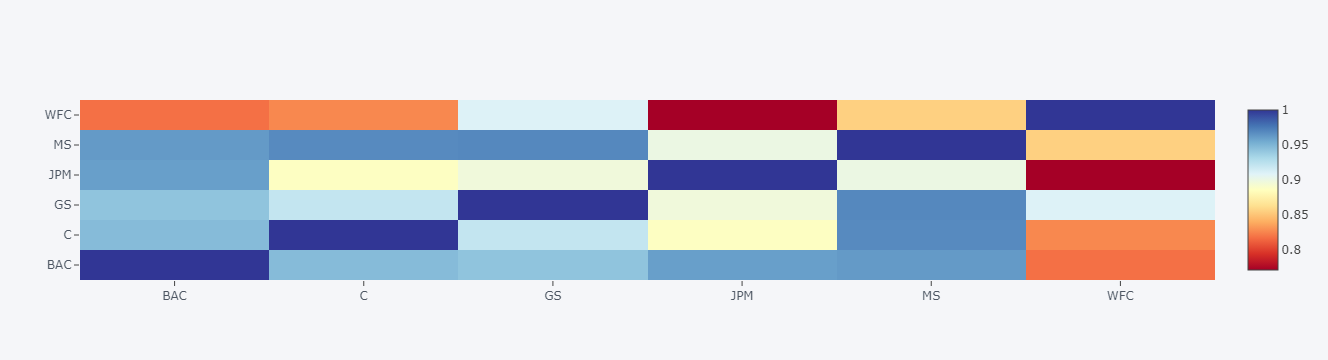

In [88]:
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

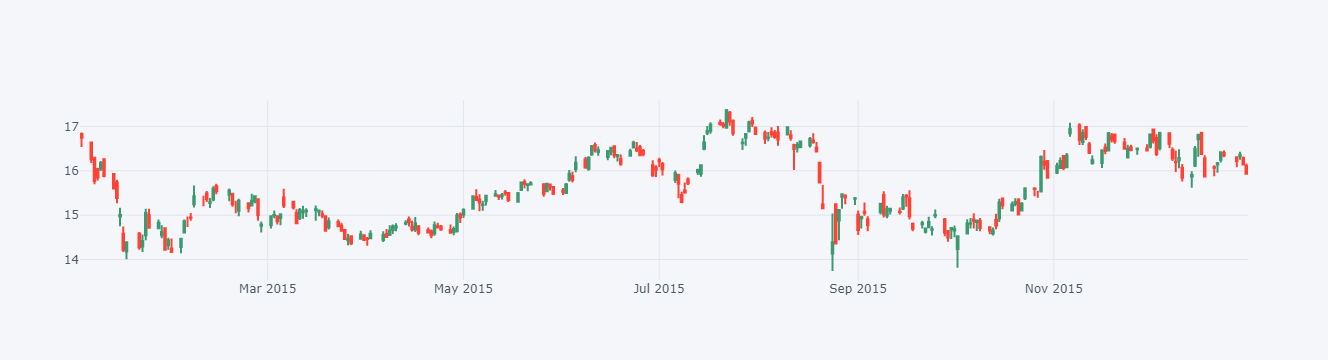

In [89]:
BAC[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

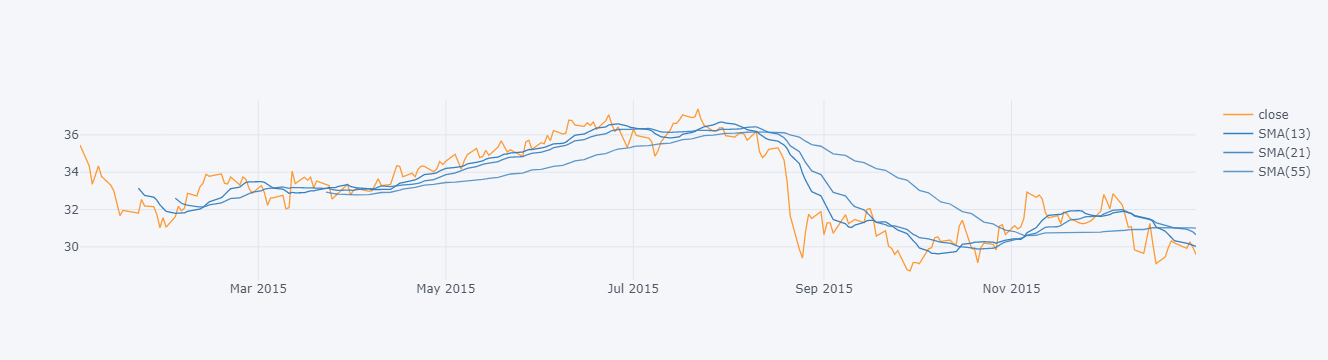

In [90]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

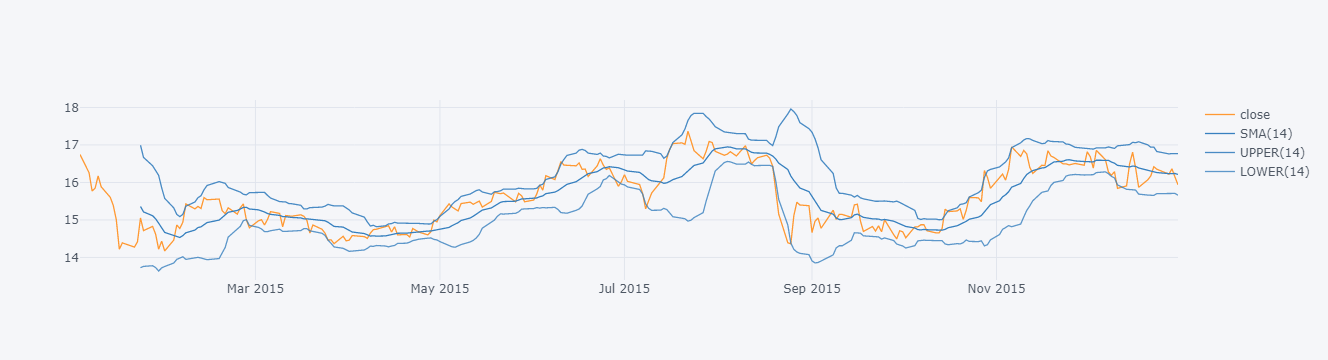

In [91]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')